In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df_store = pd.read_csv("/content/stores_data_set.csv")

In [4]:
df_store.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
df = pd.read_csv("/content/sales_data_set.csv")

In [6]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [7]:
d = df.merge(df_store,on=["Store"],how ="inner")

In [8]:

d.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315


# **Features**

In [9]:

df1 = pd.read_csv("/content/Features_data_set.csv")

In [10]:
df = df1.merge(d,on = ['Store','Date'],how = 'inner')

In [11]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False,A,151315


In [12]:
df.drop(['IsHoliday_y'],axis = 1,inplace = True)

In [13]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


In [14]:

df.isna().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_x          0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
dtype: int64

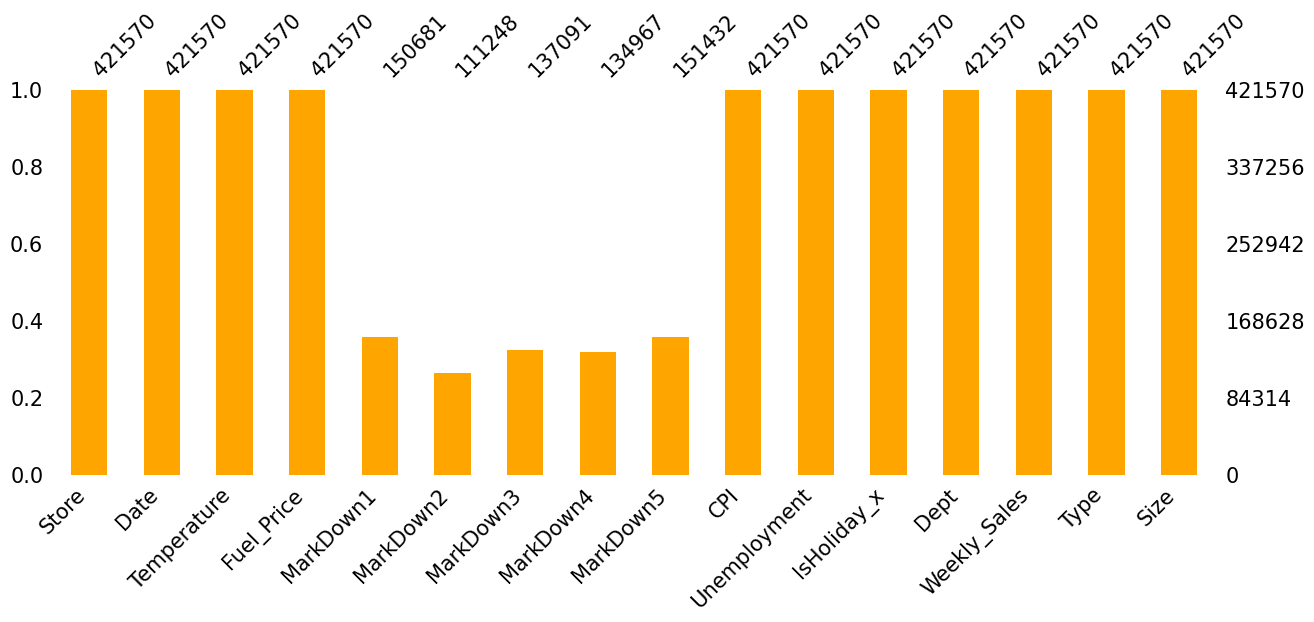

In [15]:
import missingno as msno
msno.bar(df,figsize=(15, 5),fontsize=15, color='orange');


In [16]:
df.fillna(0,inplace = True)


In [17]:
df.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_x     0
Dept            0
Weekly_Sales    0
Type            0
Size            0
dtype: int64

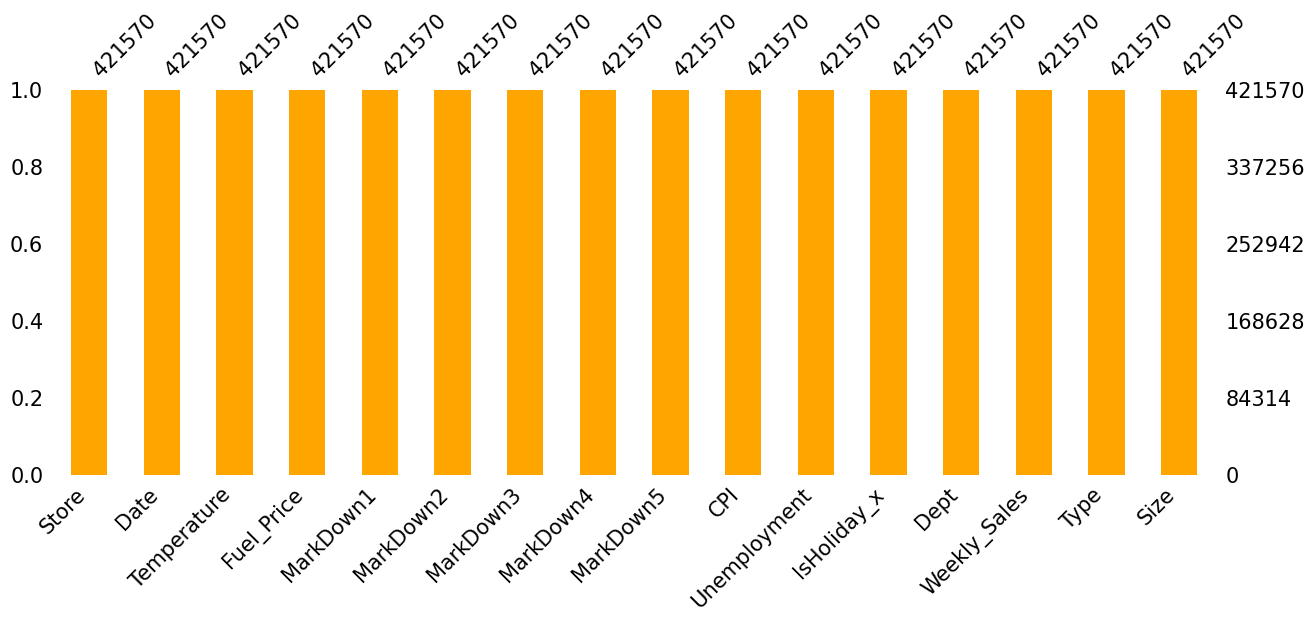

In [18]:
import missingno as msno
msno.bar(df,figsize=(15, 5),fontsize=15, color='orange');

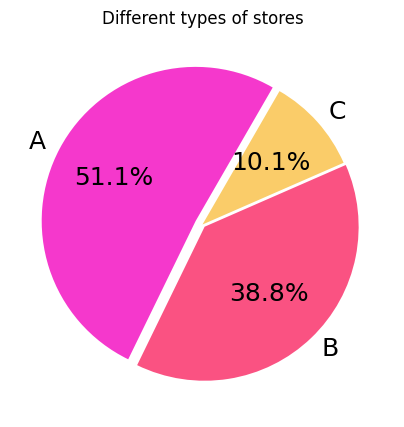

In [19]:

# pie chart
labels = df.Type.value_counts().index.tolist()
sizes = df.Type.value_counts().values.tolist()
explode = (0.05, 0.02, 0)
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=60,
        textprops={'fontsize': 18},colors=['#f538cc','#fa5282','#facc69'])
plt.title('Different types of stores');

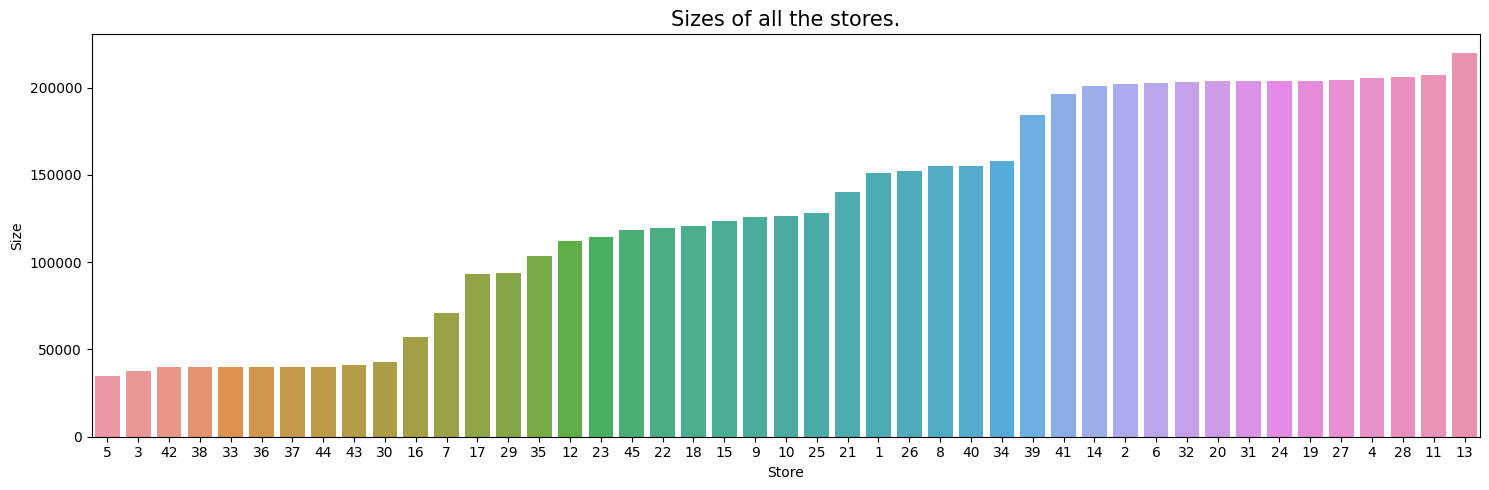

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Size',data=df_store,order=df_store.sort_values('Size')['Store'].tolist())
plt.title('Sizes of all the stores.',fontsize=15)
plt.tight_layout();

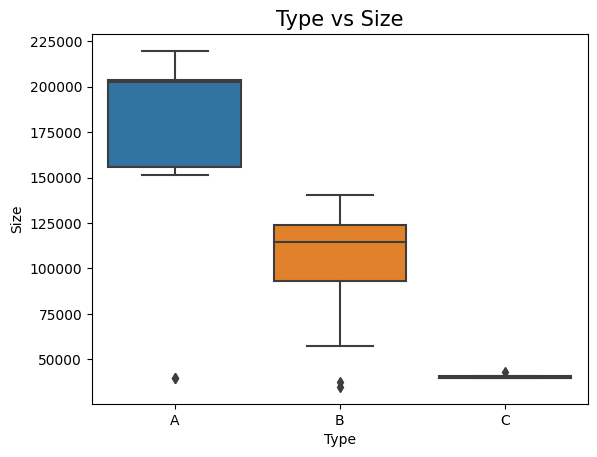

In [21]:
#sns.set_style('whitegrid')
sns.boxplot(x='Type',y='Size',data=df_store)
plt.title('Type vs Size',fontsize=15);

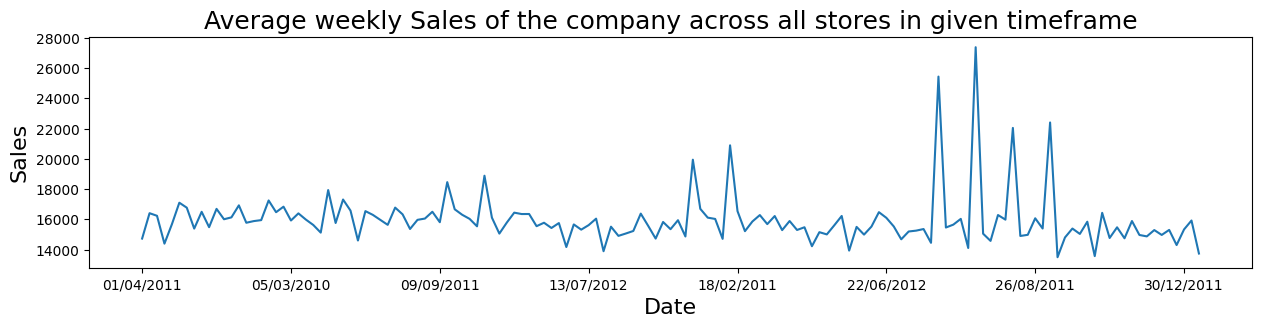

In [22]:
plt.figure(figsize=(15,3))
df.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title('Average weekly Sales of the company across all stores in given timeframe', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16);

In [23]:
df["Date"] = pd.to_datetime(df["Date"])

<ipython-input-23-cc2372053ca6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])


In [24]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = pd.to_datetime(df["Date"]).dt.day
df["Week"] = df["Date"].dt.isocalendar().week


In [25]:
df[(df['Weekly_Sales'] < 0)].count() #Practically not possible hence removing these values

Store           1285
Date            1285
Temperature     1285
Fuel_Price      1285
MarkDown1       1285
MarkDown2       1285
MarkDown3       1285
MarkDown4       1285
MarkDown5       1285
CPI             1285
Unemployment    1285
IsHoliday_x     1285
Dept            1285
Weekly_Sales    1285
Type            1285
Size            1285
Year            1285
Month           1285
Day             1285
Week            1285
dtype: int64

In [26]:
df.drop(df[df['Weekly_Sales'] < 0].index,inplace = True)

<ipython-input-28-64f3dcb4b045>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['Year']==2010].groupby('Month').mean()['Weekly_Sales'].plot()
<ipython-input-28-64f3dcb4b045>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['Year']==2011].groupby('Month').mean()['Weekly_Sales'].plot()
<ipython-input-28-64f3dcb4b045>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['Year']==2012].groupby('Month').mean

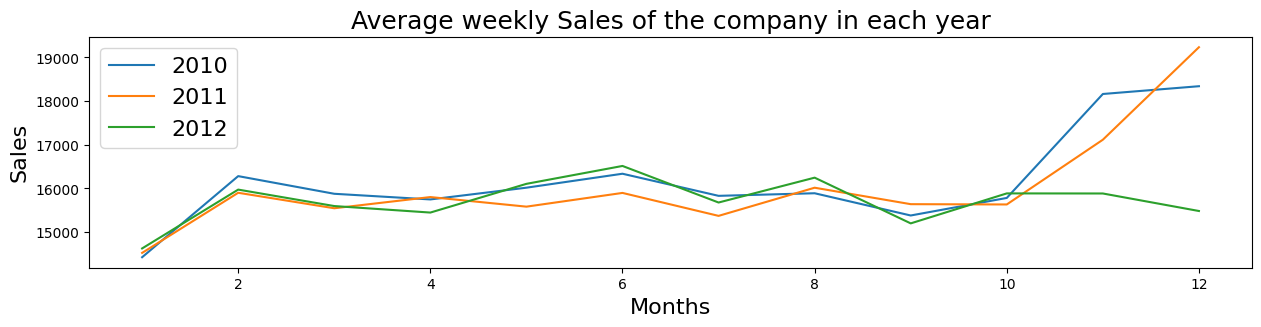

In [28]:
# Average weekly Sales of the company in each year


plt.figure(figsize=(15,3))
df[df['Year']==2010].groupby('Month').mean()['Weekly_Sales'].plot()
df[df['Year']==2011].groupby('Month').mean()['Weekly_Sales'].plot()
df[df['Year']==2012].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company in each year', fontsize=18)
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);

In [29]:
df.rename(columns = {"IsHoliday_x":"IsHoliday"},inplace = True)

In [30]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Month,Day,Week
0,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315,2010,5,2,17
1,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315,2010,5,2,17
2,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315,2010,5,2,17
3,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315,2010,5,2,17
4,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315,2010,5,2,17


In [31]:
df["Markdown"] = (df[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]] == 0).all(axis=1).astype(int)

In [32]:
df["Markdown"].value_counts()

1    269337
0    150948
Name: Markdown, dtype: int64

In [33]:
#True - 1,False -0
df.IsHoliday.replace({True :1,False:0},inplace = True)

In [34]:
df.Type.replace({"A":1,"B":0,"C":-1},inplace = True)


[link text](https://)**EDA Analysis**

In [ ]:
import seaborn as sns

<ipython-input-27-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

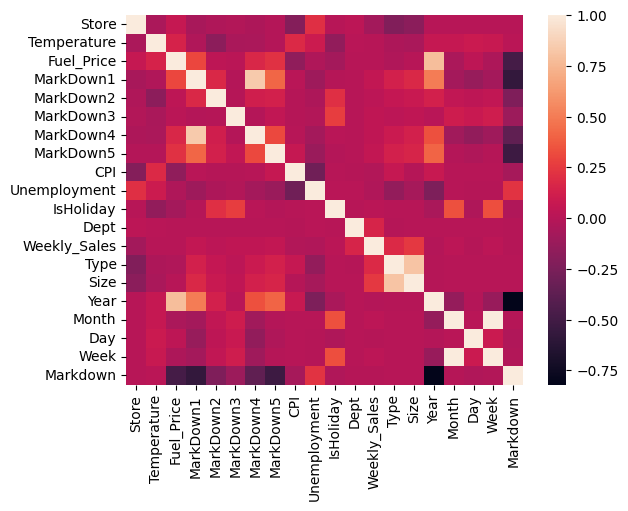

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.to_csv("Sales_with_Markdown.csv")

# **RANDOM FOREST**

In [ ]:
#Random Forest
y = df["Weekly_Sales"]
x = df.drop(["Weekly_Sales","Date","Size",'Week','Markdown'],axis = 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=40)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores_r2 = cross_val_score(model, x, y, cv=kf, scoring='r2')

# Display the cross-validation R-squared scores
print("Cross-Validation R-squared Scores:", cv_scores_r2)

# Calculate the average R-squared score
avg_cv_score_r2 = cv_scores_r2.mean()
print("Average Cross-Validation R-squared Score:", avg_cv_score_r2)

Cross-Validation R-squared Scores: [0.96424122 0.96091089 0.9633387  0.96691898 0.95733935]
Average Cross-Validation R-squared Score: 0.9625498289365361


# **ADA BOOST**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize the base estimator (weak learner)
base_estimator = DecisionTreeRegressor(max_depth=100)

# Initialize the AdaBoostRegressor model
model = AdaBoostRegressor(base_estimator=base_estimator)

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores_r2 = cross_val_score(model, x, y, cv=kf, scoring='r2')

# Display the cross-validation R-squared scores
print("Cross-Validation R-squared Scores:", cv_scores_r2)

# Calculate the average R-squared score
avg_cv_score_r2 = cv_scores_r2.mean()
print("Average Cross-Validation R-squared Score:", avg_cv_score_r2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Cross-Validation R-squared Scores: [0.96709763 0.96828511 0.9670635  0.96827085 0.96041837]
Average Cross-Validation R-squared Score: 0.966227093473649


# **GRADIENT BOOST**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
y = df["Weekly_Sales"]
x = df.drop(["Weekly_Sales","Date","Size",'Week','Markdown'],axis = 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

model = GradientBoostingRegressor()

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores_r2 = cross_val_score(model, x, y, cv=kf, scoring='r2')

# Display the cross-validation R-squared scores
print("Cross-Validation R-squared Scores:", cv_scores_r2)

# Calculate the average R-squared score
avg_cv_score_r2 = cv_scores_r2.mean()
print("Average Cross-Validation R-squared Score:", avg_cv_score_r2)

Cross-Validation R-squared Scores: [0.71262809 0.69643529 0.70764944 0.71814421 0.68349112]
Average Cross-Validation R-squared Score: 0.7036696299874098


In [ ]:
df = pd.read_csv("/content/Sales_with_Markdown.csv")

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# Define features (x) and target variable (y)
y = df["Weekly_Sales"]
x = df.drop(["Weekly_Sales", "Date", 'Week'], axis=1)


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=40)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=40)

In [ ]:
pip install joblib

In [ ]:
import joblib
joblib.dump(model, 'sales_.pkl')

['sales_.pkl']